In [2]:
import tensorflow as tf### models
from tensorflow import keras
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from keras.layers import Normalization, Dense, InputLayer
from keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [3]:
data=pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [85]:
tensor_data=tf.constant(data)

In [7]:
tensor_data=tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[9.910000e+02 5.132420e+05 8.125060e+05 ... 8.900000e+01 1.270000e+02
  4.188715e+05]
 [2.600000e+01 5.770400e+05 7.232830e+05 ... 9.600000e+01 1.360000e+02
  3.818465e+05]
 [4.000000e+02 6.816350e+05 8.647260e+05 ... 9.000000e+01 1.330000e+02
  5.823470e+05]
 ...
 [7.160000e+02 5.338650e+05 7.101030e+05 ... 9.200000e+01 8.900000e+01
  2.442875e+05]
 [2.710000e+02 6.279180e+05 8.727790e+05 ... 1.000000e+02 1.240000e+02
  4.418650e+05]
 [8.100000e+02 6.377190e+05 8.117200e+05 ... 5.500000e+01 1.140000e+02
  1.502345e+05]], shape=(1000, 12), dtype=float64)


In [86]:
X=tensor_data[:,3:-1]
print(X.shape)

(1000, 8)


In [89]:
y=tensor_data[:,-1]
y=tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 1)


In [90]:
normalizer=Normalization()

In [91]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


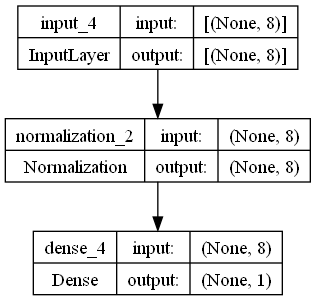

In [92]:
tf.keras.utils.plot_model(model, to_file="model.png",show_shapes=True)

In [58]:
model.compile(optimizer=Adam(learning_rate=1),loss=MeanAbsoluteError(),metrics=RootMeanSquaredError())

In [34]:
history=model.fit(X,y, epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 876us/step - loss: 308510.5938 - root_mean_squared_error: 333252.9375
Epoch 2/100
32/32 [==============================] - 0s 860us/step - loss: 308510.5625 - root_mean_squared_error: 333252.9375
Epoch 3/100
32/32 [==============================] - 0s 804us/step - loss: 308510.5938 - root_mean_squared_error: 333252.8750
Epoch 4/100
32/32 [==============================] - 0s 852us/step - loss: 308510.5625 - root_mean_squared_error: 333252.8438
Epoch 5/100
32/32 [==============================] - 0s 953us/step - loss: 308510.5000 - root_mean_squared_error: 333252.8125
Epoch 6/100
32/32 [==============================] - 0s 924us/step - loss: 308510.4688 - root_mean_squared_error: 333252.8125
Epoch 7/100
32/32 [==============================] - 0s 919us/step - loss: 308510.4062 - root_mean_squared_error: 333252.7500
Epoch 8/100
32/32 [==============================] - 0s 957us/step - loss: 308510.4062 - root_mean_squared_error: 3332

In [38]:
history.history

{'loss': [308510.59375,
  308510.5625,
  308510.59375,
  308510.5625,
  308510.5,
  308510.46875,
  308510.40625,
  308510.40625,
  308510.3125,
  308510.3125,
  308510.28125,
  308510.28125,
  308510.25,
  308510.21875,
  308510.1875,
  308510.125,
  308510.09375,
  308510.09375,
  308510.0625,
  308510.03125,
  308509.90625,
  308509.90625,
  308509.875,
  308509.9375,
  308509.84375,
  308509.75,
  308509.78125,
  308509.75,
  308509.71875,
  308509.65625,
  308509.625,
  308509.59375,
  308509.59375,
  308509.53125,
  308509.53125,
  308509.4375,
  308509.5,
  308509.40625,
  308509.375,
  308509.375,
  308509.40625,
  308509.28125,
  308509.28125,
  308509.25,
  308509.21875,
  308509.1875,
  308509.125,
  308509.125,
  308509.09375,
  308509.03125,
  308509.03125,
  308509.03125,
  308509.0,
  308508.90625,
  308508.875,
  308508.8125,
  308508.875,
  308508.78125,
  308508.75,
  308508.75,
  308508.6875,
  308508.6875,
  308508.625,
  308508.59375,
  308508.53125,
  308508.5,
  

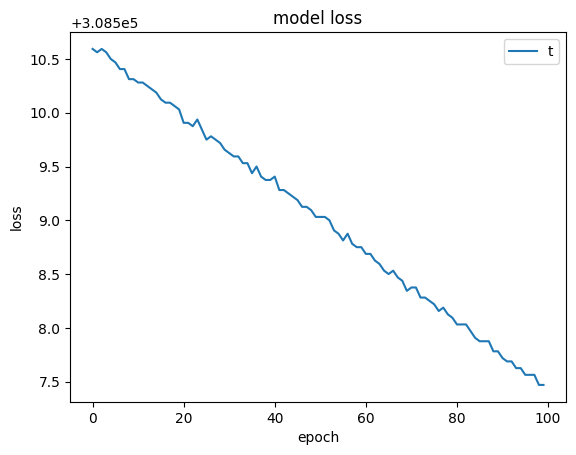

In [42]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train')
plt.show() 

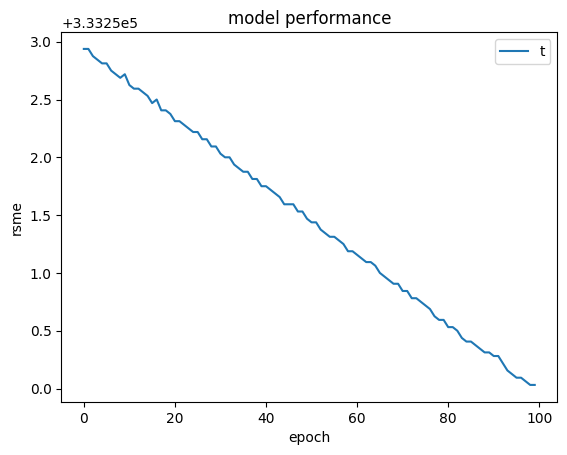

In [44]:
plt.plot(history.history['root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rsme')
plt.xlabel('epoch')
plt.legend('train')
plt.show() 

In [45]:
model.evaluate(X,y)

32/32 [==============================] - 0s 928us/step - loss: 308507.4062 - root_mean_squared_error: 333249.9688


[308507.40625, 333249.96875]

In [48]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)


In [49]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [50]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [51]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [52]:
normalizer.adapt(X_train)

In [59]:
history=model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 305186.7500 - root_mean_squared_error: 330185.8438 - val_loss: 315425.0938 - val_root_mean_squared_error: 338221.2812
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 305161.3125 - root_mean_squared_error: 330162.0625 - val_loss: 315399.1875 - val_root_mean_squared_error: 338196.2812
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 305136.2812 - root_mean_squared_error: 330138.5938 - val_loss: 315374.9062 - val_root_mean_squared_error: 338174.0938
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 305111.2812 - root_mean_squared_error: 330115.8438 - val_loss: 315349.7500 - val_root_mean_squared_error: 338150.6875
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 305086.5938 - root_mean_squared_error: 330093.5625 - val_loss: 315324.1875 - val_root_mean_squared_error: 338127.5625
Epoch 6/100
25/25 [==========================

In [60]:
history.history

{'loss': [305186.75,
  305161.3125,
  305136.28125,
  305111.28125,
  305086.59375,
  305061.21875,
  305036.46875,
  305011.3125,
  304986.46875,
  304961.34375,
  304936.34375,
  304911.4375,
  304886.59375,
  304861.40625,
  304836.28125,
  304811.5625,
  304786.34375,
  304761.34375,
  304736.28125,
  304711.3125,
  304686.1875,
  304661.34375,
  304636.25,
  304611.3125,
  304586.25,
  304561.1875,
  304536.46875,
  304511.40625,
  304486.34375,
  304461.3125,
  304436.25,
  304411.3125,
  304386.3125,
  304361.3125,
  304336.3125,
  304311.4375,
  304286.4375,
  304261.53125,
  304236.25,
  304211.28125,
  304186.46875,
  304161.46875,
  304136.375,
  304111.34375,
  304086.46875,
  304061.34375,
  304036.28125,
  304011.375,
  303986.40625,
  303961.34375,
  303936.40625,
  303911.375,
  303886.34375,
  303861.40625,
  303836.46875,
  303811.375,
  303786.46875,
  303761.25,
  303736.375,
  303711.3125,
  303686.25,
  303661.34375,
  303636.1875,
  303611.28125,
  303586.3125,
 

C:\Users\alisu\AppData\Local\Temp\ipykernel_9148\2241471421.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train','val')


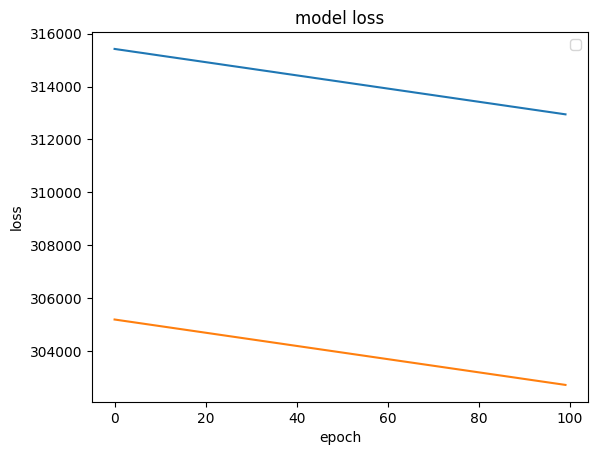

In [62]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train','val')
plt.show() 

C:\Users\alisu\AppData\Local\Temp\ipykernel_9148\2764030987.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train','val')


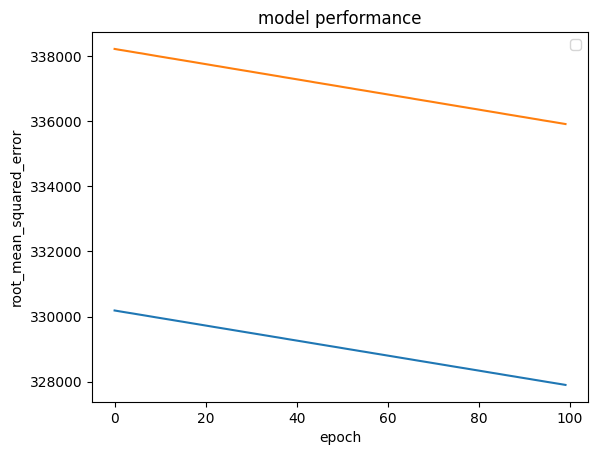

In [63]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend('train','val')
plt.show() 

In [65]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 325517.0938 - root_mean_squared_error: 349666.5000


[325517.09375, 349666.5]

In [83]:
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 38ms/step


array([[2512.5925]], dtype=float32)

In [84]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([274075.])>